# Importing Important Librais 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Data Set 

In [3]:
data = pd.read_csv("Heart Disease.csv")

# Data Set  Exploration


In [4]:
data.shape

(319795, 18)

In [5]:
data.drop_duplicates()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [6]:
data.shape

(319795, 18)

In [7]:
data.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
234666,No,34.01,No,No,No,0,0,No,Female,70-74,White,Yes,Yes,Good,8,No,No,No
206039,No,32.28,No,No,No,0,0,No,Male,30-34,White,No,Yes,Very good,7,No,No,No
291017,No,35.44,Yes,No,No,2,0,Yes,Male,70-74,White,No,Yes,Good,6,No,No,Yes
286057,No,31.17,No,No,No,0,0,No,Male,60-64,Black,"No, borderline diabetes",No,Good,7,No,No,No
55600,No,23.49,No,No,No,0,0,No,Female,55-59,Black,No,Yes,Excellent,8,No,No,No
270939,No,21.62,No,No,No,0,0,No,Male,30-34,White,No,Yes,Excellent,8,Yes,No,No
256112,No,26.61,No,No,No,0,0,No,Female,18-24,White,No,Yes,Very good,8,No,No,No
245205,No,36.32,No,No,No,0,5,No,Female,50-54,White,No,Yes,Excellent,6,Yes,No,No
110443,No,35.85,No,No,No,1,0,No,Female,18-24,White,No,No,Very good,9,No,No,No
10645,No,21.29,Yes,Yes,No,0,0,No,Female,60-64,White,No,Yes,Good,7,No,No,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
data.isnull().values.any()

False

In [11]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [12]:
data.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [13]:
Have_HeartDisease_Count = len(data[data.HeartDisease == "Yes" ])
No_HeartDisease_Count = len(data[data.HeartDisease == "No" ])


In [14]:
print(f"Percentage of Patients Haven Heart Disease: {Have_HeartDisease_Count / (len(data.HeartDisease))*100} %")
print(f"Percentage of Patients Haven't Heart Disease: {No_HeartDisease_Count / (len(data.HeartDisease))*100} %")


Percentage of Patients Haven Heart Disease: 8.559545959130068 %
Percentage of Patients Haven't Heart Disease: 91.44045404086994 %


# Data Set Visualization

In [15]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in data.columns:
    if is_numeric_dtype(data[column]):
        continue 
    else:
        data[column] = LabelEncoder().fit_transform(data[column])

In [16]:
data.sample(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
46922,0,33.89,1,0,0,10,20,0,1,3,5,0,0,2,3,0,0,0
179171,0,25.69,0,0,0,14,0,0,0,6,3,0,0,2,7,0,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [18]:
data.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


<AxesSubplot:>

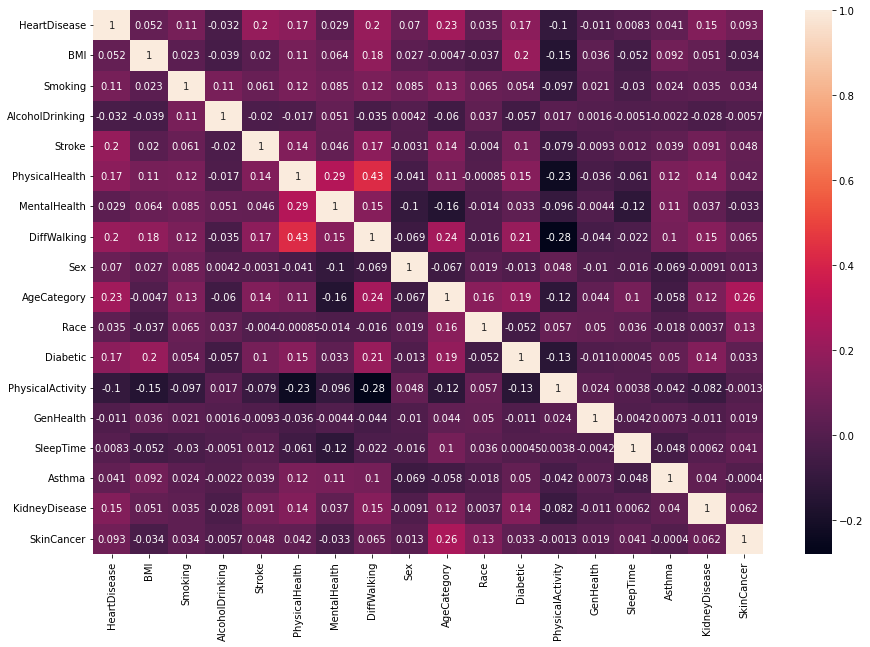

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True )

Text(0.5, 1.0, "Percentage of Patients Haven Heart Disease: 8.559545959130068 %   and  Percentage of Patients Haven't Heart Disease: 91.44045404086994 % ")

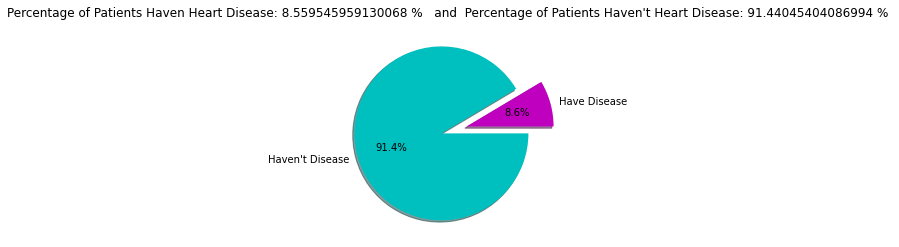

In [20]:
label =  "Have Disease","Haven't Disease"
sizes = [(Have_HeartDisease_Count / (len(data.HeartDisease))*100) , (No_HeartDisease_Count / (len(data.HeartDisease))*100) ]
colors = ["m","c"]
plt.pie(sizes,labels=label,colors = colors, shadow = True,autopct = "%1.1f%%",explode= ([0.2,0.1]))
plt.title(f"Percentage of Patients Haven Heart Disease: {(Have_HeartDisease_Count / (len(data.HeartDisease))*100)} %   and  Percentage of Patients Haven't Heart Disease: {No_HeartDisease_Count / (len(data.HeartDisease))*100} % ")




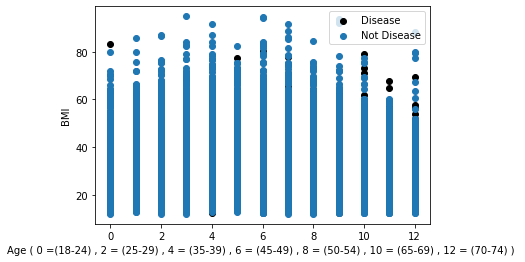

In [21]:
plt.scatter(x=data.AgeCategory[data.HeartDisease==1], y=data.BMI[(data.HeartDisease==1)], c="black")
plt.scatter(x=data.AgeCategory[data.HeartDisease==0], y=data.BMI[(data.HeartDisease==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age ( 0 =(18-24) , 2 = (25-29) , 4 = (35-39) , 6 = (45-49) , 8 = (50-54) , 10 = (65-69) , 12 = (70-74) ) ")
plt.ylabel("BMI")
plt.show()

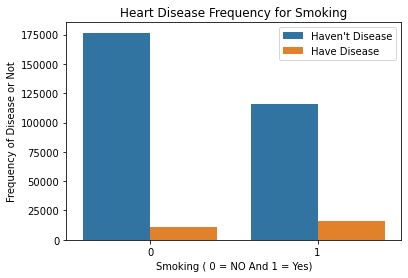

In [22]:
sns.countplot(x = "Smoking", hue = "HeartDisease", data = data)
plt.title('Heart Disease Frequency for Smoking')
plt.xlabel('Smoking ( 0 = NO And 1 = Yes)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

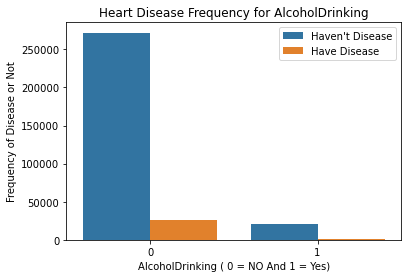

In [23]:
sns.countplot(x = "AlcoholDrinking", hue = "HeartDisease", data = data)
plt.title('Heart Disease Frequency for AlcoholDrinking')
plt.xlabel('AlcoholDrinking ( 0 = NO And 1 = Yes)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

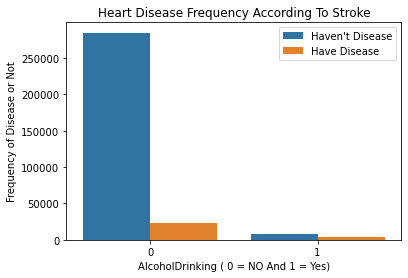

In [24]:
sns.countplot(x = "Stroke", hue = "HeartDisease", data = data)
plt.title('Heart Disease Frequency According To Stroke')
plt.xlabel('AlcoholDrinking ( 0 = NO And 1 = Yes)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

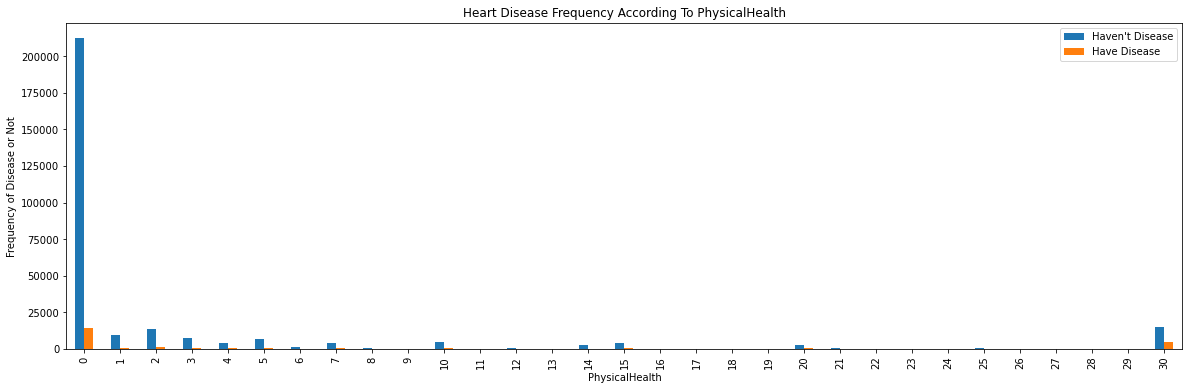

In [25]:
pd.crosstab(data.PhysicalHealth,data.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency According To PhysicalHealth')
plt.xlabel('PhysicalHealth')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

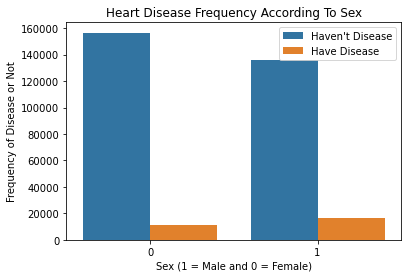

In [26]:
sns.countplot(x = "Sex", hue = "HeartDisease", data = data )
plt.title('Heart Disease Frequency According To Sex')
plt.xlabel('Sex (1 = Male and 0 = Female)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

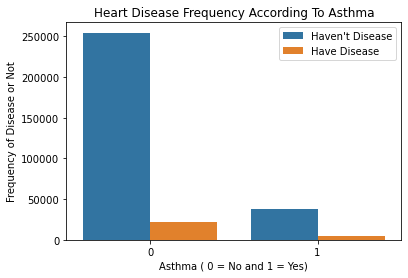

In [27]:
sns.countplot(x = "Asthma", hue = "HeartDisease", data = data)
plt.title('Heart Disease Frequency According To Asthma')
plt.xlabel('Asthma ( 0 = No and 1 = Yes)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

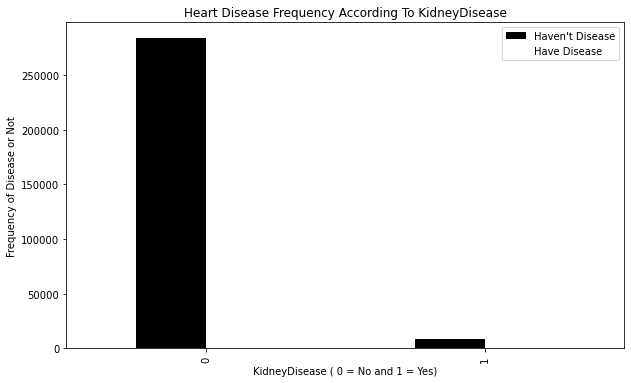

In [28]:
pd.crosstab(data.KidneyDisease,data.HeartDisease).plot(kind="bar",figsize=(10,6) ,color=['black','white' ])

plt.title('Heart Disease Frequency According To KidneyDisease')
plt.xlabel('KidneyDisease ( 0 = No and 1 = Yes)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

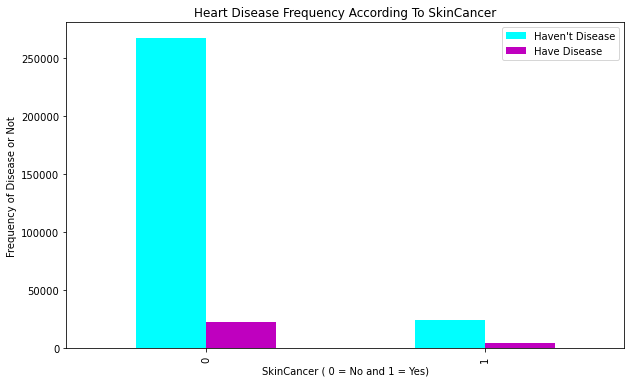

In [29]:

pd.crosstab(data.SkinCancer,data.HeartDisease).plot(kind="bar",figsize=(10,6),color=['cyan','m' ])

plt.title('Heart Disease Frequency According To SkinCancer')
plt.xlabel('SkinCancer ( 0 = No and 1 = Yes)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Apply Feature Encoding Techniques 

---Here the data type of 14 features is the object
---So have to encode these 14 features

1---I will apply label encoding technique on these 11 features =  [ HeartDisease, Smoking , AlcoholDrinking , Stroke , DiffWalking ,Sex  ,  Diabetic , PhysicalActivity , Asthma , KidneyDisease , SkinCancer]

2---apply Ordinal encoding technique on this feature = [ AgeCategory ]

3---apply One Hot encoding technique on these 2 features = [ GenHealth , Race]

In [30]:
# 1 apply label encoding technique

columns = [ "HeartDisease", "Smoking" , "AlcoholDrinking" , "Stroke" , "DiffWalking" ,"Sex"  ,  "Diabetic" , "PhysicalActivity" , "Asthma" , "KidneyDisease" , "SkinCancer"]

for column in columns:
        data[column] = LabelEncoder().fit_transform(data[column])

In [31]:
# 2 apply Ordinal encoding technique
data.AgeCategory.unique()

array([ 7, 12,  9, 11,  4, 10,  8,  6,  5,  0,  3,  2,  1])

In [32]:
# 3 apply One Hot encoding technique

columns = ["GenHealth" , "Race"]

for column in columns :
    dummy_value = pd.get_dummies(data[column], drop_first = True)
    
    data = pd.concat([data,dummy_value],axis=1).drop(column,axis=1)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int32  
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  SleepTime         319795 non-null  int64  
 13  Asthma            319795 non-null  int64  
 14  KidneyDisease     319795 non-null  int64  
 15  SkinCancer        319795 non-null  int64  
 16  1                 31

In [34]:
data.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SkinCancer,1,2,3,4,1,2,3,4,5
99494,1,18.94,1,0,0,7,10,0,0,11,...,0,1,0,0,0,0,0,0,0,1
48110,0,32.45,0,0,1,5,0,1,0,11,...,1,0,0,1,0,0,0,0,0,1
269919,0,25.84,0,0,0,0,0,0,1,9,...,0,0,0,0,1,0,0,0,0,1
112271,0,29.99,0,0,0,0,0,0,1,7,...,0,0,0,0,1,0,0,0,0,1
138921,0,26.39,0,0,0,0,1,0,1,4,...,0,0,0,0,0,0,0,0,0,1
16538,0,32.78,1,0,0,30,0,0,1,10,...,1,0,0,1,0,0,0,0,0,1
245305,0,20.92,1,0,0,0,0,0,0,6,...,0,0,0,0,1,0,0,0,0,1
68896,0,27.91,0,0,0,0,0,0,1,11,...,1,0,0,0,1,0,0,0,0,1
25364,0,29.68,1,0,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
127698,0,33.28,0,0,0,0,27,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Separate Features , Label --- and Imbalanced Data Handling

In [35]:
Normal_Featurs = data.drop("HeartDisease" ,axis = 1)
Normal_Classes = data.HeartDisease

In [36]:
Normal_Featurs.shape

(319795, 24)

In [37]:
Normal_Classes.shape

(319795,)

In [38]:
Normal_Classes.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [39]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
#1. Apply RandomOverSampler

from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state = 42)

OverSampling_Featurs , OverSampling_Classes = ROS.fit_resample(Normal_Featurs , Normal_Classes)

In [41]:
OverSampling_Featurs.shape

(584844, 24)

In [42]:
OverSampling_Classes.shape

(584844,)

In [43]:
OverSampling_Classes.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [44]:
#2. Apply NearMiss = UnderSampler

from imblearn.under_sampling import NearMiss

Near = NearMiss()

UnderSampling_Featurs , UnderSampling_Classes = Near.fit_resample(Normal_Featurs , Normal_Classes)

In [45]:
UnderSampling_Featurs.shape

(54746, 24)

In [46]:
UnderSampling_Classes.shape


(54746,)

In [47]:
UnderSampling_Classes.value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

In [ ]:
#3. Apply NearMiss = UnderSampler
from imblearn.combine import SMOTETomek

SM = SMOTETomek(random_state = 42)

Combine_Featurs , Combine_Classes = SM.fit_resample(Normal_Featurs ,Normal_Classes)

In [ ]:
## Combine_Featurs.shape

In [ ]:
##Combine_Classes.shape

In [ ]:
Combine_Classes.value_counts()

# Apply KNN_Classifier and Cross Validation Techniques

---Here i will apply KNN_Classifier algorithm and three cross validation techniques on (Normal, Over_Sampling , Under_Sampling and Combine ) data sets .

1st --- Apply KNN_Classifier with Hold Out Cross Validation technique on (Normal, Over_Sampling , Under_Sampling and Combine ) data sets .

2nd --- Apply KNN_Classifier with K Fold Cross Validation technique on (Normal, Over_Sampling , Under_Sampling and Combine ) data sets .


3rd --- Apply KNN_Classifier with Stratified k fold cross Validation technique on (Normal, Over_Sampling , Under_Sampling and Combine ) data sets .

# 1st ---

In [ ]:
# --- Apply KNN_Classifier with Hold Out Cross Validation technique on Normal data set.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts

KNC = KNeighborsClassifier()

Normal_Featurs_train ,Normal_Featurs_test ,Normal_Classes_train , Normal_Classes_test = tts(Normal_Featurs,Normal_Classes , test_size = 0.30, random_state = 42)

In [ ]:
KNC_Normal_dataset_HoldOut = KNC.fit(Normal_Featurs_train,Normal_Classes_train)

In [ ]:
KNC_Normal_dataset_HoldOut_predict = KNC_Normal_dataset_HoldOut.predict(Normal_Featurs_test)

In [ ]:
KNC_Normal_dataset_accuracy = KNC.score(Normal_Featurs_test,Normal_Classes_test)

In [ ]:
KNC_Normal_dataset_accuracy

In [57]:
#Apply KNN_Classifier with Hold Out Cross Validation technique on Over_Sampling data set.

OverSampling_Featurs_train ,OverSampling_Featurs_test ,OverSampling_Classes_train , OverSampling_Classes_test = tts(OverSampling_Featurs,OverSampling_Classes , test_size = 0.30, random_state = 42)

In [58]:
KNC.fit(OverSampling_Featurs_train,OverSampling_Classes_train)

KNeighborsClassifier()

In [59]:
KNC_OverSampling_dataset_accuracy = KNC.score(OverSampling_Featurs_test,OverSampling_Classes_test)

In [60]:
KNC_OverSampling_dataset_accuracy

0.8878566461864649

In [61]:
#Apply KNN_Classifier with Hold Out Cross Validation technique on under_Sampling data set.

UnderSampling_Featurs_train ,UnderSampling_Featurs_test , UnderSampling_Classes_train , UnderSampling_Classes_test = tts(UnderSampling_Featurs , UnderSampling_Classes , test_size = 0.30, random_state = 42)

In [62]:
KNC.fit(UnderSampling_Featurs_train,UnderSampling_Classes_train)

KNeighborsClassifier()

In [63]:
KNC_UnderSampling_dataset_accuracy = KNC.score(UnderSampling_Featurs_test,UnderSampling_Classes_test)

In [64]:
KNC_UnderSampling_dataset_accuracy

0.8464442279590842

# 2nd ---

In [65]:
# Apply KNN_Classifier with K Fold Cross Validation technique on Normal data set

from sklearn.model_selection import KFold, cross_val_score

In [66]:


kfold = KFold(n_splits = 4)

KNC_NormalDataset_kfold_result = cross_val_score(KNC,Normal_Featurs,Normal_Classes,cv = kfold)
KNC_NormalDataset_kfold_result = KNC_NormalDataset_kfold_result.mean()



In [67]:
# Apply KNN_Classifier with K Fold Cross Validation technique on Over Sampling data set

kfold = KFold(n_splits = 4)

KNC_OverSamplingDataset_kfold_result = cross_val_score(KNC,OverSampling_Featurs,OverSampling_Classes,cv = kfold)
KNC_OverSamplingDataset_kfold_result.mean()

0.8626505529679709

In [68]:
# Apply KNN_Classifier with K Fold Cross Validation technique on Under Sampling data set


KNC_UnderSamplingDataset_kfold_result = cross_val_score(KNC,UnderSampling_Featurs,UnderSampling_Classes,cv = kfold)
KNC_UnderSamplingDataset_kfold_result.mean()

0.6567791682056084

# Evaluate this Model = ( KNC_Normal_dataset_HoldOut ) After Tunning 

In [69]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , plot_roc_curve

In [70]:
#classification_report 

KNC_Normal_dataset_HoldOut_CR = classification_report(Normal_Classes_test,KNC_Normal_dataset_HoldOut_predict)
print(KNC_Normal_dataset_HoldOut_CR)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87649
           1       0.33      0.08      0.13      8290

    accuracy                           0.91     95939
   macro avg       0.62      0.53      0.54     95939
weighted avg       0.87      0.91      0.88     95939



In [71]:
#Accuracy Score

KNC_Normal_dataset_HoldOut_AS = accuracy_score(Normal_Classes_test,KNC_Normal_dataset_HoldOut_predict)

KNC_Normal_dataset_HoldOut_AS

0.9059089629868979

In [72]:
#Confusion Matrix

KNC_Normal_dataset_HoldOut_CM = confusion_matrix(Normal_Classes_test,KNC_Normal_dataset_HoldOut_predict)

KNC_Normal_dataset_HoldOut_CM

array([[86227,  1422],
       [ 7605,   685]], dtype=int64)

Text(33.0, 0.5, 'Predicted Values')

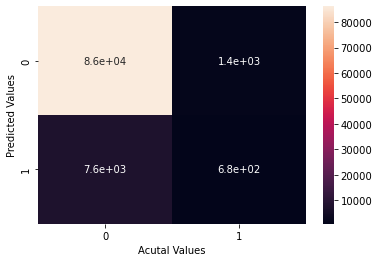

In [73]:
sns.heatmap(KNC_Normal_dataset_HoldOut_CM,annot = True)
plt.xlabel("Acutal Values")
plt.ylabel("Predicted Values")

In [74]:
tp , fn, fp ,tn = confusion_matrix(Normal_Classes_test , KNC_Normal_dataset_HoldOut_predict).reshape(-1)

In [75]:
# Precision Of Positive Predictive Value as PPPV 

KNC_Normal_dataset_HoldOut_PPV = tp/(tp+fp)

KNC_Normal_dataset_HoldOut_PPV

0.9189508909540455

In [76]:
# Sensitivity, Recall Hit Rate

KNC_Normal_dataset_HoldOut_Sensitivity = tp/(tp+fn)

KNC_Normal_dataset_HoldOut_Sensitivity

0.9837761982452737

In [77]:
# Flase Positive Rate or 1-Specificity 

KNC_Normal_dataset_HoldOut_FPR = fp/(fp+tn)

KNC_Normal_dataset_HoldOut_FPR

0.9173703256936068

In [78]:
# F1 Score

KNC_Normal_dataset_HoldOut_F1Score = (KNC_Normal_dataset_HoldOut_PPV*KNC_Normal_dataset_HoldOut_Sensitivity)/(KNC_Normal_dataset_HoldOut_PPV+KNC_Normal_dataset_HoldOut_Sensitivity)

KNC_Normal_dataset_HoldOut_F1Score

0.4751296278949312

In [79]:
#Treat Score , Critical Success or Index

KNC_Normal_dataset_HoldOut_TreatScore = tp/(tp+fn+fp)

KNC_Normal_dataset_HoldOut_TreatScore

0.9052323262015244

In [80]:
# False Discovery Rate 

KNC_Normal_dataset_HoldOut_FDR = fp/(tp+fp)
KNC_Normal_dataset_HoldOut_FDR

0.08104910904595447

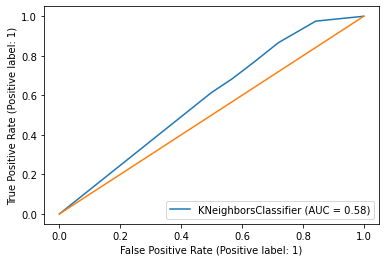

In [81]:
# ROC and AUC Curve
plot_roc_curve(KNC,Normal_Featurs_test,Normal_Classes_test)
plt.plot([0,1],[0,1])

# Tuning = ( KNC_Normal_dataset_HoldOut ) using Randomized Search CV

In [82]:

from sklearn.model_selection import RandomizedSearchCV

In [83]:
n_neighbors = [int(item) for item in np.linspace(1,500,30)]
weight = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = {
    "n_neighbors":n_neighbors,
    "weights" : weight ,
    "algorithm": algorithm
    }

In [84]:
RSCV = RandomizedSearchCV(KNC,parameters,n_iter=50)

In [ ]:
RSCV.fit(Normal_Featurs_train,Normal_Classes_train)

# Apply Random Forest Classifier and Cross Validation Techniques

# 1st---

In [ ]:
#Apply Random Forest Classifier with Hold Out Cross Validation technique on Normal data sets

from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
RFC_NormalDataset_HoldOut = RFC.fit(Normal_Featurs_train , Normal_Classes_train)


In [ ]:
RFC_NormalDataset_HoldOut_Predict = RFC_NormalDataset_HoldOut.predict(Normal_Featurs_test)

In [ ]:
RFC_NormalDataset_HoldOut.score(Normal_Featurs_test,Normal_Classes_test)

In [ ]:
#Apply Random Forest Classifier with Hold Out Cross Validation technique on Over Sampling data sets

RFC_OverSampling_Dataset_HoldOut = RFC.fit(OverSampling_Featurs_train,OverSampling_Classes_train)

RFC_OverSampling_Dataset_HoldOut_Predict = RFC_OverSampling_Dataset_HoldOut.predict(OverSampling_Featurs_test)

In [ ]:
RFC_OverSampling_Dataset_HoldOut.score(OverSampling_Featurs_test,OverSampling_Classes_test)

In [ ]:
#Apply Random Forest Classifier with Hold Out Cross Validation technique on Under Sampling data sets

RFC_UnderSampling_Dataset_HoldOut = RFC.fit(UnderSampling_Featurs_train,UnderSampling_Classes_train)

RFC_UnderSampling_Dataset_HoldOut_Predict = RFC_OverSampling_Dataset_HoldOut.predict(UnderSampling_Featurs_test)

In [ ]:
RFC_UnderSampling_Dataset_HoldOut.score(UnderSampling_Featurs_test,UnderSampling_Classes_test)

# 2nd---

In [ ]:
#Apply Random Forest Classifier with KFold Cross Validation technique on Normal data sets

kfold = KFold(n_splits = 4)

RFC_NormalDataset_kfold_result = cross_val_score(RFC,Normal_Featurs,Normal_Classes,cv = kfold)
RFC_NormalDataset_kfold_Accuracy = RFC_NormalDataset_kfold_result.mean()

In [ ]:
RFC_NormalDataset_kfold_Accuracy

In [ ]:
#Apply Random Forest Classifier with KFold Cross Validation technique on Over Sampling data sets

RFC_OverSamplingDataset_kfold_result = cross_val_score(RFC,OverSampling_Featurs,OverSampling_Classes,cv = kfold)
RFC_OverSamplingDataset_kfold_Accuracy = RFC_OverSamplingDataset_kfold_result.mean()

In [ ]:
RFC_OverSamplingDataset_kfold_Accuracy

In [ ]:
#Apply Random Forest Classifier with KFold Cross Validation technique on Under Sampling data sets

RFC_UnderSamplingDataset_kfold_result = cross_val_score(RFC,UnderSampling_Featurs,UnderSampling_Classes,cv = kfold)
RFC_UnderSamplingDataset_kfold_Accuracy = RFC_UnderSamplingDataset_kfold_result.mean()

In [ ]:
RFC_UnderSamplingDataset_kfold_Accuracy

# 3rd--

In [ ]:
from sklearn.model_selection import StratifiedKFold
Sf_Kfold = StratifiedKFold(n_splits = 4)

In [ ]:
#Apply Random Forest Classifier with Stratified KFold Cross Validation technique on Normal data sets

RFC_NormalDataset_Sf_Kfold_result = cross_val_score(RFC,Normal_Featurs,Normal_Classes,cv = Sf_Kfold)
RFC_NormalDataset_Sf_Kfold_Accuracy = RFC_NormalDataset_Sf_Kfold_result.mean()

In [ ]:
RFC_NormalDataset_Sf_Kfold_Accuracy

In [ ]:
#Apply Random Forest Classifier with Stratified KFold Cross Validation technique on Over Sampling data sets

RFC_OverSampling_Dataset_Sf_Kfold_result = cross_val_score(RFC,OverSampling_Featurs,OverSampling_Classes,cv = Sf_Kfold)
RFC_OverSampling_Dataset_Sf_Kfold_Accuracy = RFC_OverSampling_Dataset_Sf_Kfold_result.mean()

In [ ]:
RFC_OverSampling_Dataset_Sf_Kfold_Accuracy

In [ ]:
#Apply Random Forest Classifier with Stratified KFold Cross Validation technique on Under Sampling data sets

RFC_UnderSampling_Dataset_Sf_Kfold_result = cross_val_score(RFC,UnderSampling_Featurs,UnderSampling_Classes,cv = Sf_Kfold)
RFC_UnderSampling_Dataset_Sf_Kfold_Accuracy = RFC_UnderSampling_Dataset_Sf_Kfold_result.mean()

In [ ]:
RFC_UnderSampling_Dataset_Sf_Kfold_Accuracy

# Evaluate this Model = ( RFC_OverSampling_Dataset_HoldOut ) After Tunning 

In [ ]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , plot_roc_curve

In [ ]:
#classification_report 

RFC_OverSampling_Dataset_HoldOut_CR = classification_report(OverSampling_Classes_test,RFC_OverSampling_Dataset_HoldOut_Predict)
print(RFC_OverSampling_Dataset_HoldOut_CR)

In [ ]:
#Accuracy Score

RFC_OverSampling_Dataset_HoldOut_AS = accuracy_score(OverSampling_Classes_test,RFC_OverSampling_Dataset_HoldOut_Predict)

RFC_OverSampling_Dataset_HoldOut_AS

In [ ]:
#Confusion Matrix

RFC_OverSampling_Dataset_HoldOut_CM = confusion_matrix(OverSampling_Classes_test,RFC_OverSampling_Dataset_HoldOut_Predict)

RFC_OverSampling_Dataset_HoldOut_CM

In [ ]:
sns.heatmap(RFC_OverSampling_Dataset_HoldOut_CM,annot = True)
plt.xlabel("Acutal Values")
plt.ylabel("Predicted Values")

In [ ]:
tp , fn, fp ,tn = confusion_matrix(OverSampling_Classes_test,RFC_OverSampling_Dataset_HoldOut_Predict).reshape(-1)

In [ ]:
# Precision Of Positive Predictive Value as PPPV 

RFC_OverSampling_Dataset_HoldOut_PPV = tp/(tp+fp)

RFC_OverSampling_Dataset_HoldOut_PPV

In [ ]:
# Sensitivity, Recall Hit Rate

RFC_OverSampling_Dataset_HoldOut_Sensitivity = tp/(tp+fn)

RFC_OverSampling_Dataset_HoldOut_Sensitivity

In [ ]:
# Flase Positive Rate or 1-Specificity 

RFC_OverSampling_Dataset_HoldOut_FPR = fp/(fp+tn)

RFC_OverSampling_Dataset_HoldOut_FPR

In [ ]:
# F1 Score

RFC_OverSampling_Dataset_HoldOut_F1Score = (RFC_OverSampling_Dataset_HoldOut_PPV*RFC_OverSampling_Dataset_HoldOut_Sensitivity)/(RFC_OverSampling_Dataset_HoldOut_PPV+RFC_OverSampling_Dataset_HoldOut_Sensitivity)

RFC_OverSampling_Dataset_HoldOut_F1Score

In [ ]:
#Treat Score , Critical Success or Index

RFC_OverSampling_Dataset_HoldOut_TreatScore = tp/(tp+fn+fp)

RFC_OverSampling_Dataset_HoldOut_TreatScore

In [ ]:
# False Discovery Rate 

RFC_OverSampling_Dataset_HoldOut_FDR = fp/(tp+fp)
RFC_OverSampling_Dataset_HoldOut_FDR

In [ ]:
# ROC and AUC Curve
warnings.filterwarnings("ignore")

plot_roc_curve(RFC,OverSampling_Featurs_test,OverSampling_Classes_test)
plt.plot([0,1],[0,1])

# Tuning = ( RFC_OverSampling_Dataset_HoldOut ) using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(item) for item in np.linspace(20,200,15)]
criterion = ["gini", "entropy"]
max_depth = np.random.randint(1,20,25)
max_features = ["auto", "sqrt", "log2"]
min_samples_split = np.random.randint(1,15,20)


parameters = {
    "n_estimators":n_estimators,
    "criterion" : criterion ,
    "max_depth": max_depth,
    "max_features": max_features,
    "min_samples_split": min_samples_split,
    
    }

In [ ]:
RSCV2 = RandomizedSearchCV(RFC,parameters,n_iter=50)

In [ ]:
RSCV2.fit(OverSampling_Featurs_train,OverSampling_Classes_train)

In [ ]:
RSCV2_Result = pd.DataFrame(RSCV2.cv_results_)
RSCV2_Result

In [ ]:
RSCV2.best_score_

In [ ]:
RSCV2.best_estimator_

In [ ]:
RFC_OverSampling_Dataset_HoldOut_RSCV2Tunning = RandomForestClassifier(max_depth=19, max_features='sqrt', min_samples_split=7,
                       n_estimators=187)

In [ ]:
RFC_OverSampling_Dataset_HoldOut_RSCV2Tunning = RFC_OverSampling_Dataset_HoldOut_RSCV2Tunning.fit(OverSampling_Featurs_train,OverSampling_Classes_train)

In [ ]:
RFC_OverSampling_Dataset_HoldOut_RSCV2Tunning.score(OverSampling_Featurs_test,OverSampling_Classes_test)

# Apply AdaBoostClassifier and Cross Validation Techniques

In [ ]:
!pip install xgboost

# 1st--

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ADAB = AdaBoostClassifier()

In [ ]:
#Apply AdaBoostClassifier with Hold Out Cross Validation technique on Normal data set

ADAB_Normal_dataset_HoldOut = ADAB.fit(Normal_Featurs_train,Normal_Classes_train)
ADAB_Normal_dataset_HoldOut_Predict = ADAB_Normal_dataset_HoldOut.predict(Normal_Featurs_test)

In [ ]:
ADAB_Normal_dataset_HoldOut.score(Normal_Featurs_test,Normal_Classes_test)

In [ ]:
#Apply AdaBoostClassifier with Hold Out Cross Validation technique on Over Sampling data set

ADAB_OverSampling_dataset_HoldOut = ADAB.fit(OverSampling_Featurs_train , OverSampling_Classes_train)
ADAB_OverSampling_dataset_HoldOut_Pradict = ADAB_OverSampling_dataset_HoldOut.predict(OverSampling_Featurs_test)

In [ ]:
ADAB_OverSampling_dataset_HoldOut.score(OverSampling_Featurs_test , OverSampling_Classes_test)

In [ ]:
#Apply AdaBoostClassifier with Hold Out Cross Validation technique on Under Sampling data set

ADAB_UnderSampling_dataset_HoldOut = ADAB.fit(UnderSampling_Featurs_train , UnderSampling_Classes_train)
ADAB_UnderSampling_dataset_HoldOut_Pradict = ADAB_UnderSampling_dataset_HoldOut.predict(UnderSampling_Featurs_test)

In [ ]:
ADAB_UnderSampling_dataset_HoldOut.score(UnderSampling_Featurs_test,UnderSampling_Classes_test)

# 2nd---

In [ ]:
#Apply AdaBoostClassifier with K Fold Cross Validation technique on Normal data set

kfold = KFold(n_splits = 3)

ADAB_NormalDataset_kfold_result = cross_val_score(ADAB,Normal_Featurs,Normal_Classes,cv = kfold)
ADAB_NormalDataset_kfold_Accuracy = ADAB_NormalDataset_kfold_result.mean()

In [ ]:
ADAB_NormalDataset_kfold_Accuracy

In [ ]:
#Apply AdaBoostClassifier with K Fold Cross Validation technique on Over sampling data set

ADAB_OverSampling_Dataset_kfold_result = cross_val_score(ADAB,OverSampling_Featurs,OverSampling_Classes,cv = kfold)
ADAB_OverSampling_Dataset_kfold_Accuracy = ADAB_OverSampling_Dataset_kfold_result.mean()

In [ ]:
ADAB_OverSampling_Dataset_kfold_Accuracy

In [ ]:
#Apply AdaBoostClassifier with K Fold Cross Validation technique on Under sampling data set

ADAB_UnderSampling_Dataset_kfold_result = cross_val_score(ADAB,UnderSampling_Featurs,UnderSampling_Classes,cv = kfold)
ADAB_UnderSampling_Dataset_kfold_Accuracy = ADAB_UnderSampling_Dataset_kfold_result.mean()

In [ ]:
ADAB_UnderSampling_Dataset_kfold_Accuracy

# 3rd---

In [ ]:
from sklearn.model_selection import StratifiedKFold ,cross_val_predict

In [ ]:
#Apply AdaBoostClassifier with Stratified k fold cross Validation technique on Normal data set

Sf_Kfold = StratifiedKFold(n_splits = 4)

ADAB_NormalDataset_Sf_Kfold_result = cross_val_score(ADAB,Normal_Featurs,Normal_Classes,cv = Sf_Kfold)
ADAB_NormalDataset_Sf_Kfold_result_Accuracy = ADAB_NormalDataset_Sf_Kfold_result.mean()

In [ ]:
ADAB_NormalDataset_Sf_Kfold_result_Accuracy

In [ ]:
ADAB_NormalDataset_Sf_Kfold_predict = cross_val_predict(ADAB,Normal_Featurs,Normal_Classes,cv = Sf_Kfold)

In [ ]:
#Apply AdaBoostClassifier with Stratified k fold cross Validation technique on Over Sampling data set

ADAB_OverSampling_Dataset_Sf_Kfold_result = cross_val_score(ADAB,OverSampling_Featurs,OverSampling_Classes,cv = Sf_Kfold)
ADAB_OverSampling_Dataset_Sf_Kfold_Accuracy = ADAB_OverSampling_Dataset_Sf_Kfold_result.mean()

In [ ]:
ADAB_OverSampling_Dataset_Sf_Kfold_Accuracy

In [ ]:
#Apply AdaBoostClassifier with Stratified k fold cross Validation technique on Under Sampling data set

ADAB_UnderSampling_Dataset_Sf_Kfold_result = cross_val_score(ADAB,UnderSampling_Featurs,UnderSampling_Classes,cv = Sf_Kfold)
ADAB_UnderSampling_Dataset_Sf_Kfold_Accuracy = ADAB_UnderSampling_Dataset_Sf_Kfold_result.mean()

In [ ]:
ADAB_UnderSampling_Dataset_Sf_Kfold_Accuracy

# Evaluate this Model = ( ADAB_Normal_dataset_HoldOut ) 

In [ ]:
#classification_report 

ADAB_Normal_dataset_HoldOut_CR = classification_report(Normal_Classes_test,ADAB_Normal_dataset_HoldOut_Predict)
print(ADAB_Normal_dataset_HoldOut_CR)

In [ ]:
#Accuracy Score

ADAB_Normal_dataset_HoldOut_AS = accuracy_score(Normal_Classes_test,ADAB_Normal_dataset_HoldOut_Predict)

ADAB_Normal_dataset_HoldOut_AS

In [ ]:
#Confusion Matrix

ADAB_Normal_dataset_HoldOut_CM = confusion_matrix(Normal_Classes_test,ADAB_Normal_dataset_HoldOut_Predict)

ADAB_Normal_dataset_HoldOut_CM

In [ ]:
sns.heatmap(ADAB_Normal_dataset_HoldOut_CM,annot = True)
plt.xlabel("Acutal Values")
plt.ylabel("Predicted Values")

In [ ]:
tp , fn, fp ,tn = confusion_matrix(Normal_Classes_test,ADAB_Normal_dataset_HoldOut_Predict).reshape(-1)

In [ ]:
# Precision Of Positive Predictive Value as PPPV 

ADAB_Normal_dataset_HoldOut_PPV = tp/(tp+fp)

ADAB_Normal_dataset_HoldOut_PPV

In [ ]:
# Sensitivity, Recall Hit Rate

ADAB_Normal_dataset_HoldOut_Sensitivity = tp/(tp+fn)

ADAB_Normal_dataset_HoldOut_Sensitivity

In [ ]:
# Flase Positive Rate or 1-Specificity 

ADAB_Normal_dataset_HoldOut_FPR = fp/(fp+tn)

ADAB_Normal_dataset_HoldOut_FPR

In [ ]:
# F1 Score

ADAB_Normal_dataset_HoldOut_F1Score = (ADAB_Normal_dataset_HoldOut_PPV*ADAB_Normal_dataset_HoldOut_Sensitivity)/(ADAB_Normal_dataset_HoldOut_PPV+ADAB_Normal_dataset_HoldOut_Sensitivity)

ADAB_Normal_dataset_HoldOut_F1Score

In [ ]:
#Treat Score , Critical Success or Index

ADAB_Normal_dataset_HoldOut_TreatScore = tp/(tp+fn+fp)

ADAB_Normal_dataset_HoldOut_TreatScore

In [ ]:
# False Discovery Rate 

ADAB_Normal_dataset_HoldOut_FDR = fp/(tp+fp)
ADAB_Normal_dataset_HoldOut_FDR

In [ ]:
# ROC and AUC Curve
warnings.filterwarnings("ignore")
plot_roc_curve(ADAB,Normal_Featurs_test,Normal_Classes_test)
plt.plot([0,1],[0,1])

# Apply Mutinomial Naive Bayes and Cross Validation Techniques

# 1st--

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
       

In [ ]:
#Apply Mutinomial Naive Bayes with Hold Out Cross Validation technique on Normal data set

MNB_NormalDataset_HoldOut = MNB.fit(Normal_Featurs_train , Normal_Classes_train)
MNB_NormalDataset_HoldOut_Predict = MNB_NormalDataset_HoldOut.predict(Normal_Featurs_test)

MNB_NormalDataset_HoldOut_Predict_TraingData = MNB_NormalDataset_HoldOut.predict(Normal_Featurs_train)

In [ ]:
MNB_NormalDataset_HoldOut.score(Normal_Featurs_test,Normal_Classes_test)

In [ ]:
#Apply Mutinomial Naive Bayes with Hold Out Cross Validation technique on Over Sampling data set

MNB_OverSampling_Dataset_HoldOut = MNB.fit(OverSampling_Featurs_train , OverSampling_Classes_train)
MNB_OverSampling_Dataset_HoldOut_Predict = MNB_NormalDataset_HoldOut.predict(OverSampling_Featurs_test)

In [ ]:
MNB_OverSampling_Dataset_HoldOut.score(OverSampling_Featurs_test,OverSampling_Classes_test)

In [ ]:
#Apply Mutinomial Naive Bayes with Hold Out Cross Validation technique on Under Sampling data set

MNB_UnderSampling_Dataset_HoldOut = MNB.fit(UnderSampling_Featurs_train , UnderSampling_Classes_train)
MNB_UnderSampling_Dataset_HoldOut_Predict = MNB_UnderSampling_Dataset_HoldOut.predict(UnderSampling_Featurs_test)

In [ ]:
MNB_UnderSampling_Dataset_HoldOut.score(OverSampling_Featurs_test,OverSampling_Classes_test)

# 2nd---

In [ ]:
#Apply Mutinomial Naive Bayes with K Fold Cross Validation technique on Normal data sets

kfold = KFold(n_splits = 2)

MNB_NormalDataset_kfold_result = cross_val_score(MNB,Normal_Featurs,Normal_Classes,cv = kfold)
MNB_NormalDataset_kfold_Accuracy = MNB_NormalDataset_kfold_result.mean()

In [ ]:
MNB_NormalDataset_kfold_Accuracy

In [ ]:
#Apply Mutinomial Naive Bayes with K Fold Cross Validation technique on Over sampling data sets

kfold = KFold(n_splits = 5)

MNB_OverSampling_Dataset_kfold_result = cross_val_score(MNB,OverSampling_Featurs,OverSampling_Classes,cv = kfold)
MNB_OverSampling_kfold_result_Accuracy = MNB_OverSampling_Dataset_kfold_result.mean()

In [ ]:
MNB_OverSampling_kfold_result_Accuracy

In [ ]:
#Apply Mutinomial Naive Bayes with K Fold Cross Validation technique on Under sampling data sets

kfold = KFold(n_splits = 4)

MNB_UnderSamplingDataset_kfold_result = cross_val_score(MNB,UnderSampling_Featurs,UnderSampling_Classes,cv = kfold)
MNB_UnderSamplingDataset_kfold_Accuracy = MNB_UnderSamplingDataset_kfold_result.mean()

In [ ]:
MNB_UnderSamplingDataset_kfold_Accuracy

# 3rd--

In [ ]:
#Apply Mutinomial Naive Bayes with Stratified k fold cross Validation technique on Normal data sets

Sf_Kfold = StratifiedKFold(n_splits = 4)

MNB_NormalDataset_Sf_Kfold_result = cross_val_score(ADAB,Normal_Featurs,Normal_Classes,cv = Sf_Kfold)
MNB_NormalDataset_Sf_Kfold_result_Accuracy = MNB_NormalDataset_Sf_Kfold_result.mean()

In [ ]:
MNB_NormalDataset_Sf_Kfold_result_Accuracy

In [ ]:
#Apply Mutinomial Naive Bayes with Stratified k fold cross Validation technique on OverSampling data sets

MNB_OverSampling_Dataset_Sf_Kfold_result = cross_val_score(ADAB,OverSampling_Featurs,OverSampling_Classes,cv = Sf_Kfold)
MNB_OverSampling_Dataset_Sf_Kfold_Accuracy = MNB_OverSampling_Dataset_Sf_Kfold_result.mean()

In [ ]:
MNB_OverSampling_Dataset_Sf_Kfold_Accuracy

In [ ]:
#Apply Mutinomial Naive Bayes with Stratified k fold cross Validation technique on UnderSampling data sets

MNB_UnderSampling_Dataset_Sf_Kfold_result = cross_val_score(ADAB,UnderSampling_Featurs,UnderSampling_Classes,cv = Sf_Kfold)
MNB_UnderSampling_Dataset_Sf_Kfold_Accuracy = MNB_UnderSampling_Dataset_Sf_Kfold_result.mean()

In [ ]:
MNB_UnderSampling_Dataset_Sf_Kfold_Accuracy

# Evaluate this Model = ( MNB_NormalDataset_HoldOut )  

In [ ]:
#classification_report 

MNB_NormalDataset_HoldOut_CR = classification_report(Normal_Classes_test, MNB_NormalDataset_HoldOut_Predict)
print(MNB_NormalDataset_HoldOut_CR)

In [ ]:
#Accuracy Score

MNB_NormalDataset_HoldOut_AS = accuracy_score(Normal_Classes_test, MNB_NormalDataset_HoldOut_Predict)

MNB_NormalDataset_HoldOut_AS

In [ ]:
#Confusion Matrix

MNB_NormalDataset_HoldOut_CM = confusion_matrix(Normal_Classes_test, MNB_NormalDataset_HoldOut_Predict)

MNB_NormalDataset_HoldOut_CM

In [ ]:
from sklearn import metrics

f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Normal_Classes_train,MNB_NormalDataset_HoldOut_Predict_TraingData)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Normal_Classes_test, MNB_NormalDataset_HoldOut_Predict)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][1]);
a[0][1].set_title('Test Data');

In [ ]:
tp , fn, fp ,tn = confusion_matrix(Normal_Classes_test, MNB_NormalDataset_HoldOut_Predict).reshape(-1)

In [ ]:
# Precision Of Positive Predictive Value as PPPV 

MNB_NormalDataset_HoldOut_PPV = tp/(tp+fp)

MNB_NormalDataset_HoldOut_PPV

In [ ]:
# Sensitivity, Recall Hit Rate

MNB_NormalDataset_HoldOut_Sensitivity = tp/(tp+fn)

MNB_NormalDataset_HoldOut_Sensitivity

In [ ]:
# Flase Positive Rate or 1-Specificity 

MNB_NormalDataset_HoldOut_FPR = fp/(fp+tn)

MNB_NormalDataset_HoldOut_FPR

In [ ]:
# F1 Score

MNB_NormalDataset_HoldOut_F1Score = (MNB_NormalDataset_HoldOut_PPV*MNB_NormalDataset_HoldOut_Sensitivity)/(MNB_NormalDataset_HoldOut_PPV+MNB_NormalDataset_HoldOut_Sensitivity)

MNB_NormalDataset_HoldOut_F1Score

In [ ]:
#Treat Score , Critical Success or Index

MNB_NormalDataset_HoldOut_TreatScore = tp/(tp+fn+fp)

MNB_NormalDataset_HoldOut_TreatScore

In [ ]:
# False Discovery Rate 

MNB_NormalDataset_HoldOut_FDR = fp/(tp+fp)
MNB_NormalDataset_HoldOut_FDR

In [ ]:
# ROC and AUC Curve

warnings.filterwarnings("ignore")

plot_roc_curve(MNB,Normal_Featurs_test,Normal_Classes_test)
plt.plot([0,1],[0,1])

# Check Over Fitting and Under Fitting

In [ ]:
# Check Over Fitting and Under Fitting for nomar data set using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

estimators = np.random.randint(20,200,15)

Normal_Dataset_TraingScore = []
Normal_Dataset_TestingScore = []


for n in estimators:
    RFC = RandomForestClassifier(n_estimators = n)
    RFC.fit(Normal_Featurs_train , Normal_Classes_train)
    
    #Chack Training Accuracy
    
    Normal_Dataset_train_prediction = RFC.predict(Normal_Featurs_train)
    Normal_Dataset_train_accuracy = RFC.score(Normal_Featurs_train,Normal_Classes_train)
    Normal_Dataset_TraingScore.append(Normal_Dataset_train_accuracy)
    
    #Chack Testing Accuracy
    
    Normal_Dataset_testing_prediction = RFC.predict(Normal_Featurs_test)
    Normal_Dataset_testing_accuracy = RFC.score(Normal_Featurs_test,Normal_Classes_test)
    Normal_Dataset_TestingScore.append(Normal_Dataset_testing_accuracy)


    print(f"Estimators = {n} , Normal Dataset Train Accuracy = {Normal_Dataset_train_accuracy} , Normal Dataset Testing Accuracy = {Normal_Dataset_testing_accuracy}")

In [ ]:
plt.plot(estimators , Normal_Dataset_TraingScore , marker = "+" , label = "train")
plt.plot(estimators , Normal_Dataset_TestingScore , marker = "*" , label = "test")

plt.legend()

In [ ]:
# Check Over Fitting and Under Fitting for OverSampling dataset using RandomForestClassifier

estimators = np.random.randint(20,200,10)

OverSampling_Dataset_TraingScore = []
OverSampling_Dataset_TestingScore = []


for n in estimators:
    RFC = RandomForestClassifier(n_estimators = n)
    RFC.fit(OverSampling_Featurs_train , OverSampling_Classes_train)
    
    #Chack OverSampling Dataset Training Accuracy
    
    OverSampling_Dataset_train_prediction = RFC.predict(OverSampling_Featurs_train)
    OverSampling_Dataset_train_accuracy = RFC.score(OverSampling_Featurs_train , OverSampling_Classes_train)
    OverSampling_Dataset_TraingScore.append(OverSampling_Dataset_train_accuracy)
    
    #Chack OverSampling Dataset Testing Accuracy
    
    OverSampling_Dataset_testing_prediction = RFC.predict(OverSampling_Featurs_test)
    OverSampling_Dataset_testing_accuracy = RFC.score(OverSampling_Featurs_test , OverSampling_Classes_test)
    OverSampling_Dataset_TestingScore.append(OverSampling_Dataset_testing_accuracy)


    print(f"Estimators = {n} , OverSampling Dataset Train Accuracy = {OverSampling_Dataset_train_accuracy} , OverSampling Dataset Testing Accuracy = {OverSampling_Dataset_testing_accuracy}")

In [ ]:
# Check Over Fitting and Under Fitting for UnderSampling dataset using RandomForestClassifier

estimators = np.random.randint(10,250,10)

UnderSampling_Dataset_TraingScore = []
UnderSampling_Dataset_TestingScore = []


for n in estimators:
    RFC = RandomForestClassifier(n_estimators = n)
    RFC.fit(UnderSampling_Featurs_train , UnderSampling_Classes_train)
    
    #Chack UnderSampling Dataset Training Accuracy
    
    UnderSampling_Dataset_train_prediction = RFC.predict(UnderSampling_Featurs_train)
    UnderSampling_Dataset_train_accuracy = RFC.score(UnderSampling_Featurs_train , UnderSampling_Classes_train)
    UnderSampling_Dataset_TraingScore.append(UnderSampling_Dataset_train_accuracy)
    
    #Chack UnderSampling Dataset Testing Accuracy
    
    UnderSampling_Dataset_testing_prediction = RFC.predict(UnderSampling_Featurs_test)
    UnderSampling_Dataset_testing_accuracy = RFC.score(UnderSampling_Featurs_test , UnderSampling_Classes_test)
    UnderSampling_Dataset_TestingScore.append(UnderSampling_Dataset_testing_accuracy)


    print(f"Estimators = {n} , UnderSampling Dataset Train Accuracy = {UnderSampling_Dataset_train_accuracy} , UnderSampling Dataset Testing Accuracy = {UnderSampling_Dataset_testing_accuracy}")